Experimenting with making a fits file for the hslp

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
from craftroom import resample
from scipy.interpolate import interp1d


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
ecsv_table = Table.read('../combined/gj_674_sed_var_res_v3.ecsv')

/home/david/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:981: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


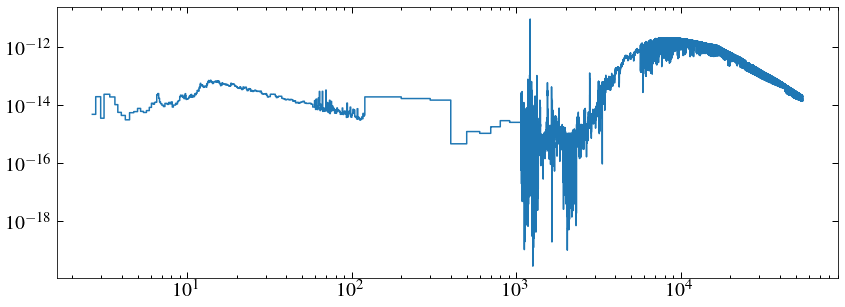

In [5]:
plt.plot(ecsv_table['WAVELENGTH'][ecsv_table['FLUX'] >0], ecsv_table['FLUX'][ecsv_table['FLUX'] >0], drawstyle='steps-mid')
plt.xscale('log')
plt.yscale('log')

What's in a MUSCLES fits file?

In [6]:
hdul = fits.open('../../../stuff/muscles_eg/gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits')

In [7]:
hdul.info()

Filename: ../../../stuff/muscles_eg/gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   ()      
  1  SPECTRUM      1 BinTableHDU     59   1196260R x 13C   [D, D, D, D, D, D, I, D, D, J, D, D, D]   
  2  INSTLGND      1 BinTableHDU     32   24R x 5C   [J, 5A, 18A, 6A, 70A]   


In [8]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'MULTI   '                                                            
INSTRUME= 'MULTI   '                                                            
GRATING = 'MULTI   '                                                            
TELESC00= 'MODEL   '                                                            
INSTRU00= 'PHX     '                                                            
GRATIN00= 'NA      '                                                            
TELESC01= 'MODEL   '                                                            
INSTRU01= 'EUV-SCALING'                                                         
GRATIN01= 'NA      '        

Ok that looks easy, I can build that from the instrument file.

In [9]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   94 / length of dimension 1                          
NAXIS2  =              1196260 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   13 / number of table fields                         
EXTNAME = 'SPECTRUM'                                                            
EXTNO   =                    2                                                  
TDESC1  = 'midpoint of the wavelength bin'                                      
TDESC2  = 'left/blue edge of the wavelength bin'                                
TDESC3  = 'right/red edge of

In [10]:
hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  103 / length of dimension 1                          
NAXIS2  =                   24 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
EXTNO   =                    3                                                  
TTYPE1  = 'BITVALUE'                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'TELESCOPE'                                                           
TFORM2  = '5A      '        

making a fake spectrum to experiment with

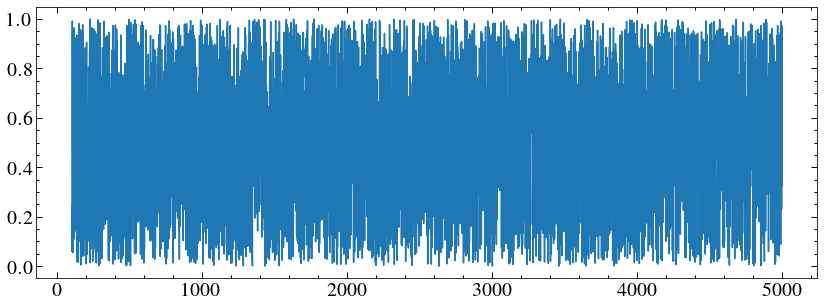

In [11]:
w = np.arange(100, 5000, 1)
f = np.random.random(len(w))
plt.plot(w,f)

In [12]:
data = Table([w*u.AA, f*u.erg/u.s/u.cm**2/u.AA], names = ['WAVELENGTH', 'FLUX'])

In [13]:
data.write('test.fits')

OSError: File exists: test.fits

In [14]:
hdul = fits.open('test.fits')

In [15]:
hdul.info()

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     15   4900R x 2C   [D, D]   


In [16]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                 4900 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'FLUX    '                                                            
TFORM2  = 'D       '        

In [17]:
data.meta['TEST'] ='hello'

In [18]:
hdul.close()

In [19]:
data.write('test.fits', overwrite= True)

In [20]:
hdul = fits.open('test.fits')

In [21]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [22]:
hdul[0].header['test'] = 'Hello again'

In [23]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TEST    = 'Hello again'                                                         

In [24]:
hdul[0].header['test2'] = 'Hello thrice'

In [25]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TEST    = 'Hello again'                                                         
TEST2   = 'Hello thrice'                                                        

Looks like what I need is here https://docs.astropy.org/en/stable/io/fits/#creating-a-new-fits-file

In [26]:
dat, names = [w*u.AA, f*u.erg/u.s/u.cm**2/u.AA], ['WAVELENGTH', 'FLUX']
cols = []
for col, name in zip(dat, names):
    cols.append(fits.Column(name=name, format ='E', array=col))

In [27]:
data = Table([w*u.AA, f*u.erg/u.s/u.cm**2/u.AA], names = ['WAVELENGTH', 'FLUX'])

In [28]:
hdu = fits.table_to_hdu(data)

In [29]:
hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                 4900 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'FLUX    '                                                            
TFORM2  = 'D       '        

In [30]:
hdr = fits.Header()
hdr['Line1'] = 'This should be first'
hdr['parttwo'] ='Then this one'
primary_hdu = fits.PrimaryHDU(header=hdr)

In [31]:
hdul2 = fits.HDUList([primary_hdu, hdu])
hdul2.writeto('test2.fits', overwrite=True)

In [32]:
fits.getheader('test2.fits',1)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                 4900 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'FLUX    '                                                            
TFORM2  = 'D       '        

Ok, how to add keywords in the right order?

In [33]:
hdr

LINE1   = 'This should be first'                                                
PARTTWO = 'Then this one'                                                       

In [34]:
hdr[0]

'This should be first'

In [35]:
hdr[0] =' now what'

In [36]:
hdr['Adding'] = 'where?'

In [37]:
hdr.insert(2, 'Another', 'fixed')

In [38]:
hdr

LINE1   = ' now what'                                                           
PARTTWO = 'Then this one'                                                       
ANOTHER =                                                                       
ADDING  = 'where?  '                                                            

In [39]:
del hdr['MIDDLEmaybe?']

In [40]:
hdr ['ANOTHER'] = 'good'

In [41]:
hdr

LINE1   = ' now what'                                                           
PARTTWO = 'Then this one'                                                       
ANOTHER = 'good    '                                                            
ADDING  = 'where?  '                                                            

Ok, what about the data header?

In [42]:
hdr2 = hdu.header

In [43]:
hdr2

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                 4900 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'FLUX    '                                                            
TFORM2  = 'D       '        

In [44]:
hdr2['TEST'] = 'oh look'

In [45]:
hdr2

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                 4900 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'FLUX    '                                                            
TFORM2  = 'D       '        

In [46]:
for i, n  in zip((8,9), ('Another', 'again')):
    hdr2.insert(i, n)
#print(hdr2)
hdr2

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                 4900 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
ANOTHER =                                                                       
AGAIN   =                                                                       
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'        

In [49]:
#del hdr2['ANOTHER']
#del hdr2['and again']
#hdr2

In [50]:
hdul = fits.open('../../../stuff/muscles_eg/gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits')

In [51]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   94 / length of dimension 1                          
NAXIS2  =              1196260 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   13 / number of table fields                         
EXTNAME = 'SPECTRUM'                                                            
EXTNO   =                    2                                                  
TDESC1  = 'midpoint of the wavelength bin'                                      
TDESC2  = 'left/blue edge of the wavelength bin'                                
TDESC3  = 'right/red edge of

In [52]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'MULTI   '                                                            
INSTRUME= 'MULTI   '                                                            
GRATING = 'MULTI   '                                                            
TELESC00= 'MODEL   '                                                            
INSTRU00= 'PHX     '                                                            
GRATIN00= 'NA      '                                                            
TELESC01= 'MODEL   '                                                            
INSTRU01= 'EUV-SCALING'                                                         
GRATIN01= 'NA      '        

In [53]:
primary_hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
LINE1   = 'This should be first'                                                
PARTTWO = 'Then this one'                                                       

Primary header needs a list of all instruments used.

In [54]:
ints = np.unique(ecsv_table['INSTRUMENT'])

In [55]:
ints

1.0
8.0
128.0
256.0
6144.0
16384.0
32768.0
65536.0
131072.0
16777216.0


Why are there -99s and 0s in there? Fixed it.

In [56]:
import instruments as inst

In [57]:
for i in ints:
    print(inst.getinststr(i))

hst_cos_g130m
hst_sts_g140m
hst_sts_g230l
hst_sts_g430l


ValueError: 6144.0 is not in list

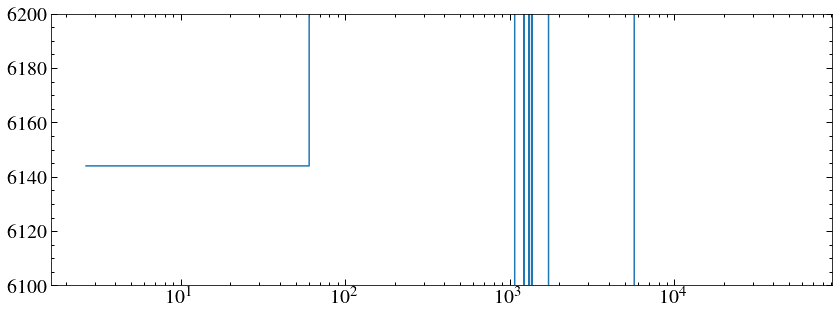

In [191]:
plt.plot(ecsv_table['WAVELENGTH'], ecsv_table['INSTRUMENT'])
plt.ylim(6100, 6200)
plt.xscale('log')

Bit of Parke's code that hopefully makes the instrument ext

In [61]:
legendcomment = ('This extension is a legend for the integer identifiers in the instrument column of the '
                  'spectrum extension. Instruments are identified by bitwise flags so that any combination of '
                  'instruments contributing to the data within a spectral element can be identified together. '
                  'For example, if instruments 4 and 16 (100 and 10000 in binary) both contribute to the data '
                  'in a bin, then that bin will have the value 20, or 10100 in binary, to signify that both '
                  'instruments 4 and 16 have contributed. This is identical to the handling of bitwise data '
                  'quality flags.')

def make_inst_ext():
    cols = [fits.Column('instruments','13A', array=inst.instruments),
                fits.Column('bitvalues', 'I', array=inst.instvals)]
    hdr = fits.Header()
    hdr['comment'] = legendcomment
    idhdu = fits.BinTableHDU.from_columns(cols, header=hdr, name='legend')
    #ftbl.append(idhdu)
    return idhdu

idhu = make_inst_ext()

In [64]:
idhu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   15 / length of dimension 1                          
NAXIS2  =                   24 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
EXTNAME = 'LEGEND  '           / extension name                                 
TTYPE1  = 'instruments'                                                         
TFORM1  = '13A     '                                                            
TTYPE2  = 'bitvalues'                                                           
TFORM2  = 'I       '        

In [65]:
hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  103 / length of dimension 1                          
NAXIS2  =                   24 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
EXTNO   =                    3                                                  
TTYPE1  = 'BITVALUE'                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'TELESCOPE'                                                           
TFORM2  = '5A      '        

In [66]:
idhu.data

FITS_rec([('hst_cos_g130m',      1), ('hst_cos_g160m',      2),
          ('hst_cos_g230l',      4), ('hst_sts_g140m',      8),
          ('hst_sts_e140m',     16), ('hst_sts_e230m',     32),
          ('hst_sts_e230h',     64), ('hst_sts_g230l',    128),
          ('hst_sts_g430l',    256), ('hst_sts_g430m',    512),
          ('mod_gap_fill-',   1024), ('xmm_epc_multi',   2048),
          ('xmm_epc_pn---',   4096), ('cxo_acs_-----',   8192),
          ('mod_euv_young',  16384), ('mod_apc_-----', -32768),
          ('mod_lya_young',      0), ('mod_phx_-----',      0),
          ('oth_---_other',      0), ('hst_sts_g230l',      0),
          ('hst_sts_g750l',      0), ('hst_fos_g570h',      0),
          ('hst_fos_g780h',      0), ('hst_cos_g140l',      0)],
         dtype=(numpy.record, [('instruments', 'S13'), ('bitvalues', '<i2')]))

In [68]:
hdul[2].data

FITS_rec([(      1, 'HST', 'COS', 'G130M', 'hlsp_muscles_hst_cos_gj176_g130m_v22_component-spec.fits'),
          (      2, 'HST', 'COS', 'G160M', 'hlsp_muscles_hst_cos_gj176_g160m_v22_component-spec.fits'),
          (      4, 'HST', 'COS', 'G230L', 'hlsp_muscles_hst_cos_gj176_g230l_v22_component-spec.fits'),
          (      8, 'HST', 'STIS', 'G140M', 'hlsp_muscles_hst_stis_gj176_g140m_v22_component-spec.fits'),
          (     16, 'HST', 'STIS', 'E140M', 'hlsp_muscles_hst_stis_gj176_e140m_v22_component-spec.fits'),
          (     32, 'HST', 'STIS', 'E230M', 'hlsp_muscles_hst_stis_gj176_e230m_v22_component-spec.fits'),
          (     64, 'HST', 'STIS', 'E230H', 'hlsp_muscles_hst_stis_gj176_e230h_v22_component-spec.fits'),
          (    128, 'HST', 'STIS', 'G230L', 'hlsp_muscles_hst_stis_gj176_g230l_v22_component-spec.fits'),
          (    256, 'HST', 'STIS', 'G430L', 'hlsp_muscles_hst_stis_gj176_g430l_v22_component-spec.fits'),
          (    512, 'HST', 'STIS', 'G430M', 'hlsp_mu

In [69]:
ecsv_table.meta

OrderedDict()

io.writehlsp has what I want for the HLSP- need to modify it but should all be there

In [70]:
from my_write_hlsp import writehlsp as hlsp_test

In [71]:
hlsp_test(ecsv_table)

KeyError: 'STAR'

What's in the separate spectra?

In [5]:
muscles_path = '../../../stuff/muscles_eg/gj176/'
os.listdir(muscles_path)

['hlsp_muscles_hst_stis_gj176_g230l_v22_component-spec.fits',
 'hlsp_muscles_hst_cos_gj176_g230l_v22_component-spec.fits',
 'hlsp_muscles_model_euv-scaling_gj176_na_v22_component-spec.fits',
 'hlsp_muscles_multi_multi_gj176_broadband_v22_adapt-const-res-sed.fits',
 'hlsp_muscles_cxo_acis_gj176_na_v22_component-spec.fits',
 'hlsp_muscles_hst_cos_gj176_g130m_v22_component-spec.fits',
 'hlsp_muscles_model_apec_gj176_na_v22_component-spec.fits',
 'hlsp_muscles_multi_multi_gj176_broadband_v22_const-res-sed.fits',
 'hlsp_muscles_model_lya-reconstruction_gj176_na_v22_component-spec.fits',
 'hlsp_muscles_hst_stis_gj176_g140m_v22_component-spec.fits',
 'hlsp_muscles_hst_stis_gj176_g430l_v22_component-spec.fits',
 'hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits',
 'hlsp_muscles_multi_multi_gj176_broadband_v22_adapt-var-res-sed.fits',
 'hlsp_muscles_hst_cos_gj176_g160m_v22_component-spec.fits',
 'hlsp_muscles_model_phx_gj176_na_v22_component-spec.fits']

In [6]:
hdul3 = fits.open(muscles_path+ 'hlsp_muscles_hst_cos_gj176_g130m_v22_component-spec.fits')

In [7]:
hdul3.info()

Filename: ../../../stuff/muscles_eg/gj176/hlsp_muscles_hst_cos_gj176_g130m_v22_component-spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   ()      
  1  SPECTRUM      1 BinTableHDU     45   32308R x 9C   [D, D, D, D, D, D, I, D, D]   
  2  SRCSPECS      1 BinTableHDU     20   5R x 2C   [9A, 9A]   


In [8]:
hdul3[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'HST     '                                                            
INSTRUME= 'COS     '                                                            
GRATING = 'G130M   '                                                            
APERTURE= 'PSA     '                                                            
TARGNAME= 'GJ176   '                                                            
RA_TARG =    70.73239599999999                                                  
DEC_TARG=            18.958163                                                  
PROPOSID=                13650                                                  
HLSPNAME= 'Measurements of t

In [10]:
hdul3[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   66 / length of dimension 1                          
NAXIS2  =                32308 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    9 / number of table fields                         
EXTNAME = 'SPECTRUM'                                                            
EXTNO   =                    2                                                  
TDESC1  = 'midpoint of the wavelength bin'                                      
TDESC2  = 'left/blue edge of the wavelength bin'                                
TDESC3  = 'right/red edge of